In [37]:
%pylab inline
%config InlineBackend.figure_format = 'retina'
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


In [38]:
# Initialize the x- and y-arrays that we will use to plot
x_axis = []
mean = []
variance = []
skew_list = []
kurt_list = []

# generate gaussian pdf of x
#mu = 2.0
#variance = 2.0
#sigma = math.sqrt(variance)
#x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
#plot(x, stats.norm.pdf(x, mu, sigma))
#show()

In [39]:
# proposal function q(x'|x)
def q(x):
    # draw from a multivariate gaussian with mean [0,0] and covariance matrix I
    # Add the randomly drawn number to x and return the sum
    mu = np.array([0.0, 0.0])
    sigma = np.matrix([ [1.0,0.0], [0.0,1.0] ])
    q = stats.multivariate_normal.rvs(mean=mu, cov=sigma)
    return x + q

Part (a)

In [40]:
# density function f(x)
# takes a vector x = (x1, x2) as input
def f(x):
    # Extract the x1 and x2 coordinates of x
    x1 = x[0]
    x2 = x[1]
    
    # Distribution function: uniform in 3<x<7 and 1<y<9, zero everywhere else
    if 3 < x1 and x1 < 7:
        if 1 < x2 and x2 < 9:
            return 1
        
    return 0

In [41]:
# Array of x-values, initialized with the vector [4,5]
xs = [[4.0,5.0]]
for i in range(10000):
    x = xs[-1]
    x_new = q(x)
    accept_ratio = f(x_new)/f(x)
    if rand() < accept_ratio:
        xs.append(x_new)
    else:
        xs.append(x)

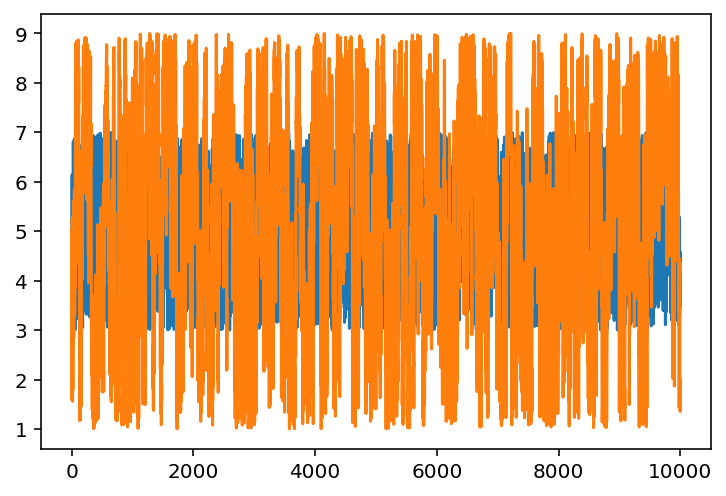

In [42]:
plot(xs)

In [43]:
# Extract x- and y-coordinates from the array of vectors
x_axis = []
y_axis = []
for i in xs:
    x_axis.append(i[0])
    y_axis.append(i[1])

c:\software\python\python3.7.4\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until
c:\software\python\python3.7.4\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


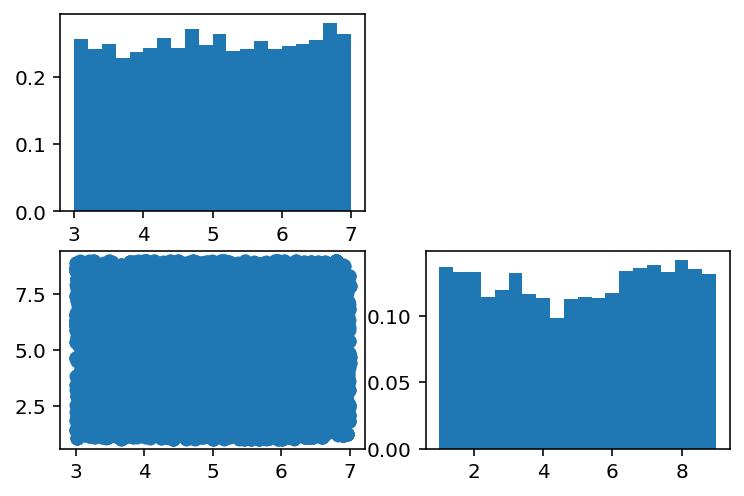

In [44]:
# histogram of x values
subplot(221)
hist(x_axis, normed=True, bins=20)

#Scatter plot
subplot(223)
scatter(x_axis, y_axis)

# histogram of y values
subplot(224)
hist(y_axis, normed=True, bins=20)

show()